# PGP DSE -Nov, 20 - Capstone Project.

## Domain of the Project : Automobile Industry.
## Proposed Project Title : Used Car Price Prediction.
## Group No : 5 
## Mentor Name : Mr. Shashank Shirude.
## Team Members :

- Ruchitha Gundlapalli
- Mohammed Harrish Musthafa.
- Mohammed Fadhil.
- Sneha Wandhare.
- Arihant Kumar Jain.



## Objective : 
The current trends on the make and type of the cars also make a huge impact on the used car prices. The main aim of this model is to predict a suitable price of the used car by applying the data science skills and knowledge that has been learned throughout the course.

### The task involve  following steps :
1. **[Data Reading](#read)**
2. **[Variable Categorization](#var)**
3. **[Data Cleaning](#clean)**
4. **[Preprocessing the Data](#pre)**
   -- **[Modifying the Dataset](#mod)**
   -- **[Dtype Conversion of columns](#dtype)**
   -- **[Modification of price column](#price)**
   -- **[Outlier Treatment](#cols)**
5. **[Feature Engineering](#fteng)**
6. **[Data Visualisation](#vis)**
7. **[Encoding](#encod)**
8. **[Pre-Modelling Steps](#premodel)**
9. **[Algorithm Comparison](#algocompar)**
10. **[Base Model](#basemodel)**

### Required Libraries :

In [ ]:
# Import the required libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')
plt.rcParams["figure.figsize"] = [15,8]

#libraries for preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

#libraries for evaluation
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score

#libraries for models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
#from yellowbrick.regressor import AlphaSelection
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

<a id = "read"> </a>
## 1. Data Reading 

In [ ]:
# Reading the dataset and displaying first 5 rows.

data = pd.read_csv('cardekho_updated.csv')
data.head()

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.2 Lakh*,NaN,2012,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,Hyundai Grand i10 Asta,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,2.15 Lakh*,NaN,2010,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,Maruti Alto K10 2010-2014 VXI,2.26 Lakh*,NaN,2012,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5


<a id = "var"> </a>
## 2. Variable Categorization

In [ ]:
# Getting information about the dataset.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19974 entries, 0 to 19973
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   full_name          19974 non-null  object
 1   selling_price      19974 non-null  object
 2   new_price          9564 non-null   object
 3   year               19974 non-null  int64 
 4   seller_type        19974 non-null  object
 5   km_driven          19974 non-null  object
 6   owner_type         19974 non-null  object
 7   fuel_type          19974 non-null  object
 8   transmission_type  19974 non-null  object
 9   mileage            19814 non-null  object
 10  engine             19864 non-null  object
 11  max_power          19637 non-null  object
 12  seats              19887 non-null  object
dtypes: int64(1), object(12)
memory usage: 2.0+ MB


- All the features are in object dtype, except the year column.
- We need identify the numerical and categorical feature and assign corresponding dtype.

In [ ]:
# Check the null values so that we can treat them.

null_value = data.isnull().sum()
print(null_value)

full_name                0
selling_price            0
new_price            10410
year                     0
seller_type              0
km_driven                0
owner_type               0
fuel_type                0
transmission_type        0
mileage                160
engine                 110
max_power              337
seats                   87
dtype: int64


In [ ]:
# Check the percentage of null values present in each columns.

null_percentage = data.isnull().sum()/len(data)*100
print(null_percentage)

full_name             0.000000
selling_price         0.000000
new_price            52.117753
year                  0.000000
seller_type           0.000000
km_driven             0.000000
owner_type            0.000000
fuel_type             0.000000
transmission_type     0.000000
mileage               0.801041
engine                0.550716
max_power             1.687193
seats                 0.435566
dtype: float64


- We need to drop the feature with large null values, which may affect our dataset.
- Since the new_price column has more than 50% of null values, we should drop the column.
- Other features with less than 5% of null values can be treated by getting the not null rows.

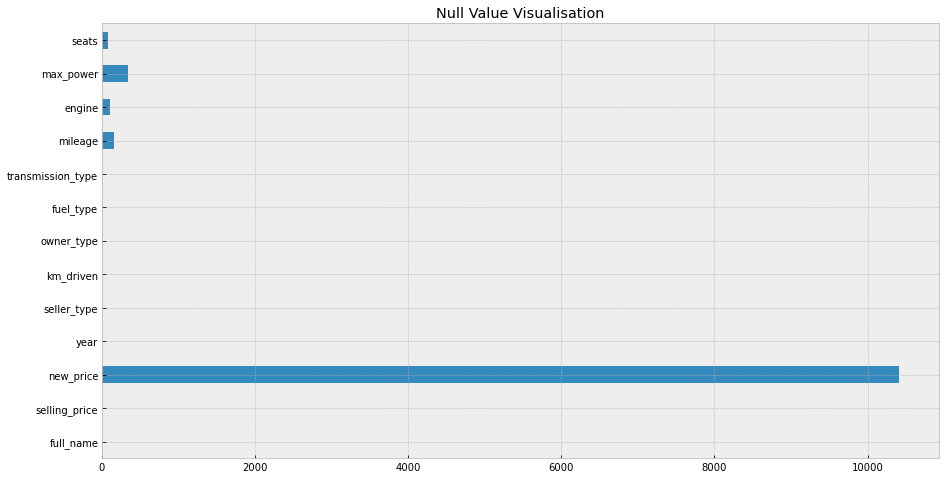

In [ ]:
# Visualising the null visualisation.

null_value.plot(kind='barh')
plt.title('Null Value Visualisation')
plt.show()

<a id = "clean"> </a>
## 3. Data Cleaning

In [ ]:
# Dropping the column with large null values.

data = data.drop('new_price', axis=1)

In [ ]:
# Treating the features with less null values by getting the not null value rows.

data = data[data['mileage'].notna()]
data = data[data['engine'].notna()]
data = data[data['max_power'].notna()]
data = data[data['seats'].notna()]

In [ ]:
# After treating the null values in the dataset and getting the shape of our dataset.

print(data.isnull().sum())
print('\n')
print('The shape of dataset after treating null values :',data.shape)

full_name            0
selling_price        0
year                 0
seller_type          0
km_driven            0
owner_type           0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
dtype: int64


The shape of dataset after treating null values : (19542, 12)


<a id = "pre"> </a>
## 4. Preprocessing the Data

- Now our dataset is free from null values, we can proceed with EDA.

In [ ]:
# Check unique values for all categorical columns.

data.owner_type.unique()

array(['First Owner'], dtype=object)

- Since the owner_type column has only one unique value, we can drop that column.

In [ ]:
# Dropping the owner_type column.

data = data.drop('owner_type', axis=1)

In [ ]:
# Check the columns of the datasets.

print(data.columns)
data.head(1)

Index(['full_name', 'selling_price', 'year', 'seller_type', 'km_driven',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats'],
      dtype='object')


,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.2 Lakh*,2012,Individual,"1,20,000 kms",Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5


In [ ]:
# Changing the names of columns for better understanding. 

data = data.rename(columns = {'full_name': 'car_name', 'selling_price': 'price',}, inplace = False)

In [ ]:
# Introducing new columns to the dataset.

data['brand'] = data['car_name'].apply(lambda x : x.split(' ')[0])          # Seperating brand name from car_name.
data['price'] = data['price'].apply(lambda x : x.split(' ')[0])             # Seperating numerical value from price.
data['age_of_car'] = data['year'].apply(lambda x : (2021 - x))              # Calculation age of car from year.
data['car_model'] = data['car_name'].apply(lambda x : x.split(' ')[1])      # Seperating model name from car_name.

In [ ]:
data.head(1)

,car_name,price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,brand,age_of_car,car_model
0,Maruti Alto Std,1.2,2012,Individual,"1,20,000 kms",Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5,Maruti,9,Alto


<a id = "mod"> </a>
## 4.a) Modifying the Dataset

In [ ]:
# Modifying the features for more readability and for ease of analysis & visualization.

# Mileage - seperating the numerical value.

data['mileage'] = data['mileage'].apply(lambda x : x[7:-5])

# Km_driven - removing ',' and seperating the numerical value.

data['km_driven'] = data.km_driven.str.replace(',','')
data['km_driven'] = data['km_driven'].apply(lambda x : x.split(' ')[0])

# Engine - seperating the numerical value.

data['engine'] = data['engine'].apply(lambda x : x[6:-2])

# Max_power - seperating the numerical value.

data['max_power'] = data['max_power'].apply(lambda x : x[9:-3])

# Seats - seperating the numerical value.

data['seats'] = data['seats'].apply(lambda x : x[-1])

# eliminate the string from numerical string - better approach.

In [ ]:
data.head(1)

,car_name,price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,brand,age_of_car,car_model
0,Maruti Alto Std,1.2,2012,Individual,120000,Petrol,Manual,19.7,796,46.3,5,Maruti,9,Alto


<a id = "dtype"> </a>
## 4.b) Dtype Conversion of columns

In [ ]:
# Converting the dtypes of columns from object to float and int dtypes.

data['mileage'] = data['mileage'].astype(float)
data['km_driven'] = data['km_driven'].astype(int)
data['engine'] = data['engine'].astype(float)
data['max_power'] = data['max_power'].astype(float)
data['seats'] = data['seats'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19542 entries, 0 to 19973
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           19542 non-null  object 
 1   price              19542 non-null  object 
 2   year               19542 non-null  int64  
 3   seller_type        19542 non-null  object 
 4   km_driven          19542 non-null  int64  
 5   fuel_type          19542 non-null  object 
 6   transmission_type  19542 non-null  object 
 7   mileage            19542 non-null  float64
 8   engine             19542 non-null  float64
 9   max_power          19542 non-null  float64
 10  seats              19542 non-null  int64  
 11  brand              19542 non-null  object 
 12  age_of_car         19542 non-null  int64  
 13  car_model          19542 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 2.2+ MB


<a id = "price"> </a>
## 4.c) Modification of price column.

- We need to convert the price_in_lakhs column to price in numbers, i.e 1.2 lakhs to 120000.
- Before that we need to check and remove the special characters in the column.

- When trying to convert the dtype, we got the following error.
- ValueError: could not convert string to float: '75,000*'
- So we know that there are special character (' * ', ' , ') that needs to be removed in the column.

In [ ]:
# Removing the special characters.

data.price = data.price.str.replace('*','')
data.price = data.price.str.replace(',','')

In [ ]:
# Changing the dtype of the column to float.

data.price = data.price.astype(float)

- Now that we removed the special characters and changed the dtype to float, we can convert the price in words to price in numbers.

In [ ]:
# Converting the price_in_lakhs to price in thousands.

data.price = data.price.apply(lambda x: x*100000 if x < 100 else x*1)

In [ ]:
# Again converting the price into lakhs

data.price = data.price.apply(lambda x: x/100000)

In [ ]:
# After cleaning the dataset.

data.head()

,car_name,price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,brand,age_of_car,car_model
0,Maruti Alto Std,1.20,2012,Individual,120000,Petrol,Manual,19.70,796.0,46.30,5,Maruti,9,Alto
1,Hyundai Grand i10 Asta,5.50,2016,Individual,20000,Petrol,Manual,18.90,1197.0,82.00,5,Hyundai,5,Grand
2,Hyundai i20 Asta,2.15,2010,Individual,60000,Petrol,Manual,17.00,1197.0,80.00,5,Hyundai,11,i20
3,Maruti Alto K10 2010-2014 VXI,2.26,2012,Individual,37000,Petrol,Manual,20.92,998.0,67.10,5,Maruti,9,Alto
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.70,2015,Dealer,30000,Diesel,Manual,22.77,1498.0,98.59,5,Ford,6,Ecosport


In [ ]:
# Check the max price of cars available in the dataset.

print('The max price of the car in the dataset is :',data.price.max())

The max price of the car in the dataset is : 92.0


In [ ]:
# Check the car model with max price. 

data[data.price == 92.0]

,car_name,price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,brand,age_of_car,car_model
423,Toyota Land Cruiser 200 V8 Petrol,92.0,2016,Dealer,80000,Petrol,Automatic,9.00,4461.0,285.4,8,Toyota,5,Land
14296,Land Rover Range Rover Sport 3.0 D SE,92.0,2017,Dealer,9500,Diesel,Automatic,12.65,2993.0,296.0,5,Land,4,Rover


- The above two rows are the cars with maximum price. 

In [ ]:
# Check the min price of cars available in the dataset.

print('The max price of the car in the dataset is :',data.price.min())

The max price of the car in the dataset is : 0.3


In [ ]:
# Check the car model with min price. 

data[data.price == 0.3]

,car_name,price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,brand,age_of_car,car_model
11037,Tata Nano Cx,0.3,2010,Individual,80000,Petrol,Manual,26.0,624.0,35.0,4,Tata,11,Nano


- The above row is the car with minimum price. 

<a id = "cols"> </a>
## 4.d) Outlier Treatment.

In [ ]:
# We can rearrange the column for better understanding of the dataset.

col = ['car_name','brand','car_model','year','age_of_car','seller_type','km_driven','fuel_type','transmission_type','mileage','engine','max_power','seats','price']
data = data.reindex(columns=col)

In [ ]:
data.head(1)

,car_name,brand,car_model,year,age_of_car,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,price
0,Maruti Alto Std,Maruti,Alto,2012,9,Individual,120000,Petrol,Manual,19.7,796.0,46.3,5,1.2


- Since we dont need price column since it has no use we can drop the price column.
- We can also change the name of price_in_lakhs into price

In [ ]:
# Renaming the price_in_lakhs column.

data = data.rename(columns={'price':'price_in_lakhs'})

In [ ]:
# After cleaning the dataset,

data.head()

,car_name,brand,car_model,year,age_of_car,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,price_in_lakhs
0,Maruti Alto Std,Maruti,Alto,2012,9,Individual,120000,Petrol,Manual,19.70,796.0,46.30,5,1.20
1,Hyundai Grand i10 Asta,Hyundai,Grand,2016,5,Individual,20000,Petrol,Manual,18.90,1197.0,82.00,5,5.50
2,Hyundai i20 Asta,Hyundai,i20,2010,11,Individual,60000,Petrol,Manual,17.00,1197.0,80.00,5,2.15
3,Maruti Alto K10 2010-2014 VXI,Maruti,Alto,2012,9,Individual,37000,Petrol,Manual,20.92,998.0,67.10,5,2.26
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,Ford,Ecosport,2015,6,Dealer,30000,Diesel,Manual,22.77,1498.0,98.59,5,5.70


In [ ]:
def outliers(arr,col):
    x=sorted(arr[col].values.ravel())
    L_25=25/100*(len(x)+1) #L_p where p=25%
    i_p=int(str(L_25).split(".")[0])
    f_p=int(str(L_25).split(".")[1])
    q1=x[i_p]+f_p*(x[i_p+1]-x[i_p])
    
    L_75=75/100*(len(x)+1) #L_p where p=75%
    i_p=int(str(L_75).split(".")[0])
    f_p=int(str(L_75).split(".")[1])
    q3=x[i_p]+f_p*(x[i_p+1]-x[i_p])
    
    #q1,q3=(arr[col].quantile([0.25,0.75]))
    
    IQR=q3-q1
    x1=q1-1.5*IQR
    x2=q3+1.5*IQR
    return (x1,x2)

In [ ]:
outliers(data,['price_in_lakhs'])

(-3.049999999999999, 14.389999999999999)

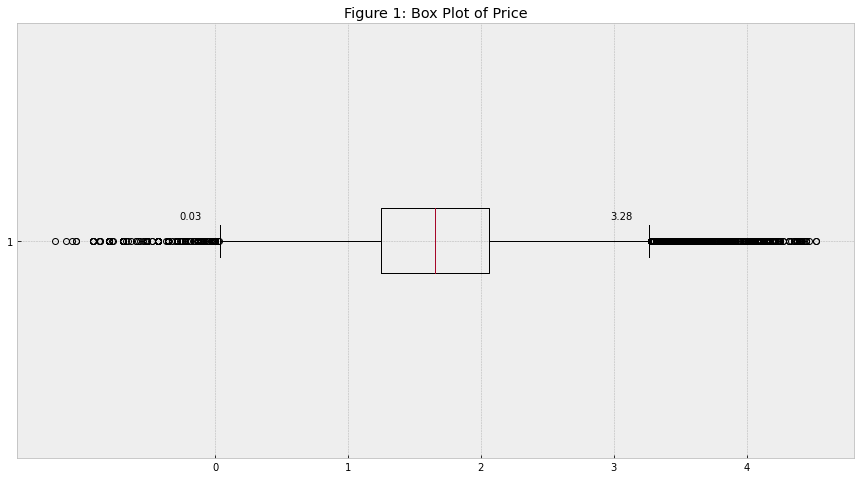

In [ ]:
def min_max_price(df):
    r=[]
    q1,q3=(df['logprice'].quantile([0.25,0.75]))
    r.append(q1-1.5*(q3-q1))
    r.append(q3+1.5*(q3-q1))
    return (r)
data['logprice'] = np.log(data['price_in_lakhs'])
x=data['logprice']
price_range=list(range(0,int(max(data['logprice']))+1))
red_square = dict(markerfacecolor='g', marker='s')
plt.boxplot(x, vert=False)
plt.xticks(price_range)
plt.text(min_max_price(data)[0]-0.3,1.05,str(round(min_max_price(data)[0],2)))
plt.text(min_max_price(data)[1]-0.3,1.05,str(round(min_max_price(data)[1],2)))
plt.title("Figure 1: Box Plot of Price")
plt.savefig('graph-boxplot-price.jpg')
plt.show()

In [ ]:
df_new=data.copy()
out=np.array(['logprice','km_driven','year'])
for col in out:
    o1,o2=outliers(df_new,col)
    df_new=df_new[(df_new[col]>=o1) & (df_new[col]<=o2)]
    print('IQR of',col,'=',o1,o2)
df_new=df_new[df_new['price_in_lakhs']!=0]
df_new.drop('logprice',axis=1,inplace=True)

IQR of logprice = 0.033984042844364515 3.276431225164288
IQR of km_driven = -31000.0 137000.0
IQR of year = 2007.0 2023.0


In [ ]:
df_new.head()

,car_name,brand,car_model,year,age_of_car,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,price_in_lakhs
0,Maruti Alto Std,Maruti,Alto,2012,9,Individual,120000,Petrol,Manual,19.70,796.0,46.30,5,1.20
1,Hyundai Grand i10 Asta,Hyundai,Grand,2016,5,Individual,20000,Petrol,Manual,18.90,1197.0,82.00,5,5.50
2,Hyundai i20 Asta,Hyundai,i20,2010,11,Individual,60000,Petrol,Manual,17.00,1197.0,80.00,5,2.15
3,Maruti Alto K10 2010-2014 VXI,Maruti,Alto,2012,9,Individual,37000,Petrol,Manual,20.92,998.0,67.10,5,2.26
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,Ford,Ecosport,2015,6,Dealer,30000,Diesel,Manual,22.77,1498.0,98.59,5,5.70


In [ ]:
df_new.shape

(17833, 14)

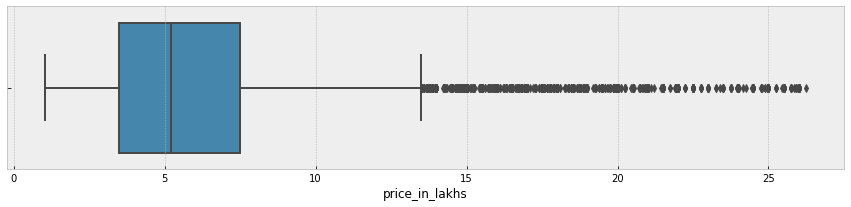

In [ ]:
plt.figure(figsize=(15,3))
sns.boxplot(df_new['price_in_lakhs'])
plt.show()

<a id = "fteng"> </a>
## 5. Feature Engineering

In [ ]:
# Since some of the features are useless, we can drop them.

final_df = df_new.drop(['car_name','brand','car_model','year'], axis=1)

In [ ]:
# After dropping the columns, dataset looks like this.

final_df.head()

,age_of_car,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,price_in_lakhs
0,9,Individual,120000,Petrol,Manual,19.70,796.0,46.30,5,1.20
1,5,Individual,20000,Petrol,Manual,18.90,1197.0,82.00,5,5.50
2,11,Individual,60000,Petrol,Manual,17.00,1197.0,80.00,5,2.15
3,9,Individual,37000,Petrol,Manual,20.92,998.0,67.10,5,2.26
4,6,Dealer,30000,Diesel,Manual,22.77,1498.0,98.59,5,5.70


In [ ]:
# Creating a new data frame for modelling 

model_df = final_df.copy()

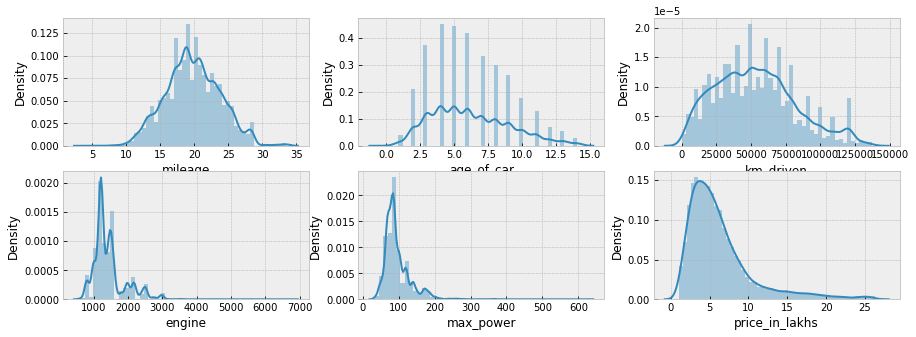

In [ ]:
plt.subplot(3,3,1)
sns.distplot(model_df.mileage)

plt.subplot(3,3,2)
sns.distplot(model_df.age_of_car)

plt.subplot(3,3,3)
sns.distplot(model_df.km_driven)

plt.subplot(3,3,4)
sns.distplot(model_df.engine)

plt.subplot(3,3,5)
sns.distplot(model_df.max_power)

plt.subplot(3,3,6)
sns.distplot(model_df.price_in_lakhs)

plt.show()

In [ ]:
model_df.head()

,age_of_car,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,price_in_lakhs
0,9,Individual,120000,Petrol,Manual,19.70,796.0,46.30,5,1.20
1,5,Individual,20000,Petrol,Manual,18.90,1197.0,82.00,5,5.50
2,11,Individual,60000,Petrol,Manual,17.00,1197.0,80.00,5,2.15
3,9,Individual,37000,Petrol,Manual,20.92,998.0,67.10,5,2.26
4,6,Dealer,30000,Diesel,Manual,22.77,1498.0,98.59,5,5.70


In [ ]:
# Transform the original, model_df

ss = StandardScaler()

model_df['age_of_car'] = ss.fit_transform(model_df[['age_of_car']])
model_df['km_driven'] = ss.fit_transform(model_df[['km_driven']])
model_df['mileage'] = ss.fit_transform(model_df[['mileage']])
model_df['engine'] = ss.fit_transform(model_df[['engine']])
model_df['max_power'] = ss.fit_transform(model_df[['max_power']])
#model_df['price_in_lakhs'] = ss.fit_transform(model_df[['price_in_lakhs']])

#scaling target variable
q1,q3=(model_df['price_in_lakhs'].quantile([0.25,0.75]))
o1=q1-1.5*(q3-q1)
o2=q3+1.5*(q3-q1)
model_df=model_df[(model_df['price_in_lakhs']>=o1) & (model_df['price_in_lakhs']<=o2)]

In [ ]:
model_df.head()

,age_of_car,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,price_in_lakhs
0,0.985102,Individual,2.311931,Petrol,Manual,-0.023009,-1.379892,-1.351292,5,1.20
1,-0.414880,Individual,-1.154437,Petrol,Manual,-0.224535,-0.509740,-0.372073,5,5.50
2,1.685094,Individual,0.232110,Petrol,Manual,-0.703158,-0.509740,-0.426932,5,2.15
3,0.985102,Individual,-0.565155,Petrol,Manual,0.284317,-0.941561,-0.780767,5,2.26
4,-0.064885,Dealer,-0.807801,Diesel,Manual,0.750345,0.143416,0.082975,5,5.70


In [ ]:
model_df.shape

(16617, 10)

In [ ]:
cat_cols = list(model_df.select_dtypes('object'))
cat_cols

le=LabelEncoder()
model_df[cat_cols]=model_df[cat_cols].apply(le.fit_transform)

In [ ]:
model_df.head()

,age_of_car,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,price_in_lakhs
0,0.985102,1,2.311931,3,1,-0.023009,-1.379892,-1.351292,5,1.20
1,-0.414880,1,-1.154437,3,1,-0.224535,-0.509740,-0.372073,5,5.50
2,1.685094,1,0.232110,3,1,-0.703158,-0.509740,-0.426932,5,2.15
3,0.985102,1,-0.565155,3,1,0.284317,-0.941561,-0.780767,5,2.26
4,-0.064885,0,-0.807801,1,1,0.750345,0.143416,0.082975,5,5.70


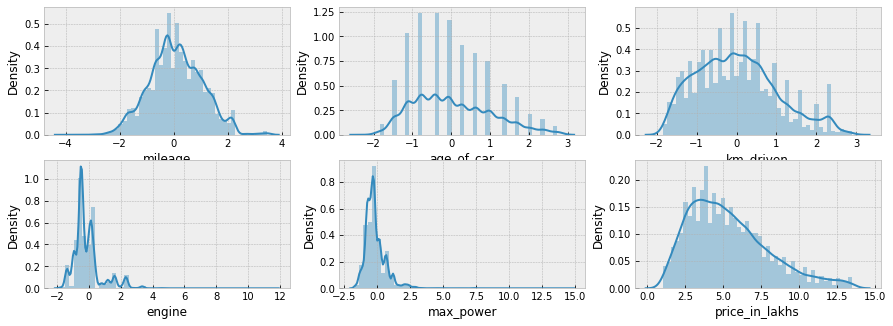

In [ ]:
plt.subplot(3,3,1)
sns.distplot(model_df.mileage)

plt.subplot(3,3,2)
sns.distplot(model_df.age_of_car)

plt.subplot(3,3,3)
sns.distplot(model_df.km_driven)

plt.subplot(3,3,4)
sns.distplot(model_df.engine)

plt.subplot(3,3,5)
sns.distplot(model_df.max_power)

plt.subplot(3,3,6)
sns.distplot(model_df.price_in_lakhs)

plt.show()

<a id = "vis"> </a>
## 6. Data Visualisation.

In [ ]:
# Plot the columns of the dataset vs the selling_price to get the relationship between those features.
# Selling price is our target variable(X)

model_df.price_in_lakhs.describe()

count    16617.000000
mean         5.378870
std          2.624981
min          1.040000
25%          3.400000
50%          4.950000
75%          6.900000
max         13.500000
Name: price_in_lakhs, dtype: float64

### 6.1 Distribution of price.

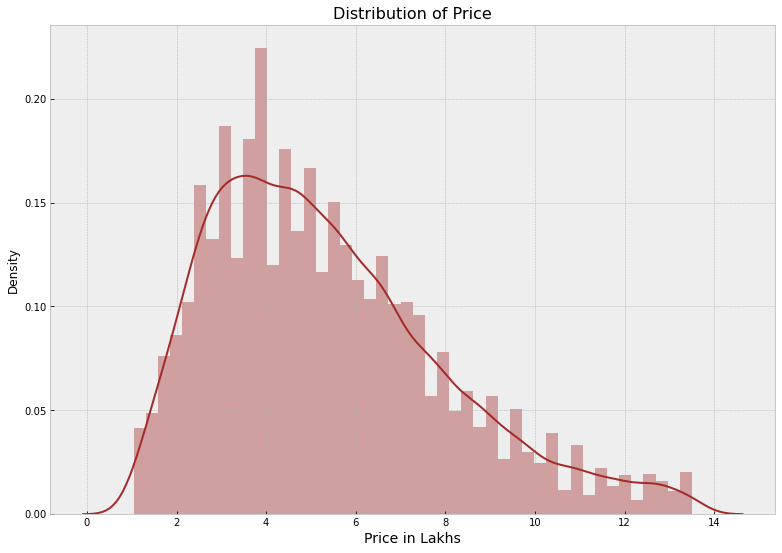

In [ ]:
# Distplot for distribution of price

plt.figure(figsize=(13,9))
sns.distplot(model_df.price_in_lakhs, color='brown')
plt.xlabel('Price in Lakhs',size=14)
plt.title('Distribution of Price',size=16)
plt.show()

In [ ]:
print("Skewness of Price of cars is : ",final_df['price_in_lakhs'].skew())

Skewness of Price of cars is :  1.9455989015230268


#####  The price of cars is positively skewed. Transformation will be required in future steps.

### 6.2 Number of Car Brand Sold.

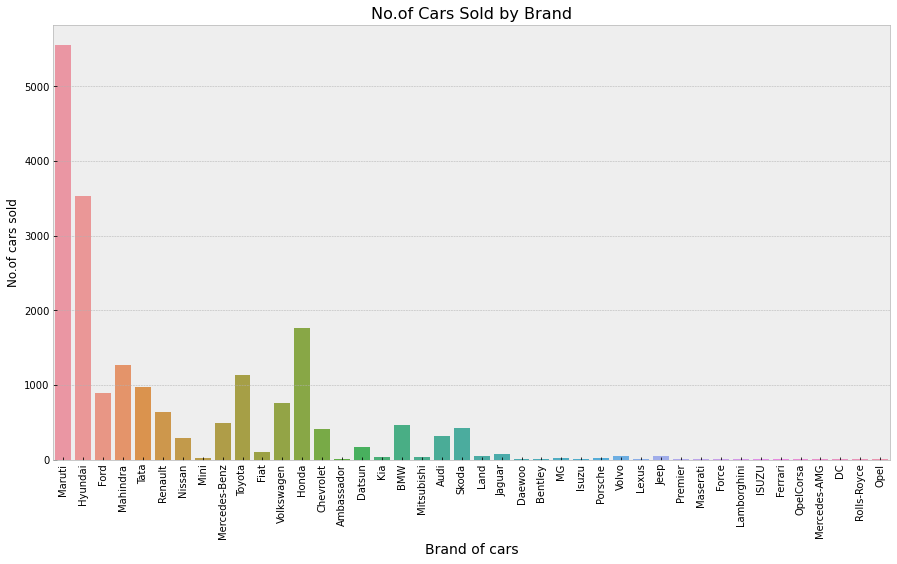

In [ ]:
sns.countplot(data.brand)
plt.xticks(rotation=90)
plt.xlabel('Brand of cars',size=14)
plt.title('No.of Cars Sold by Brand',size=16)
plt.ylabel('No.of cars sold')
plt.show()

#### We can see that `Maruti` cars are sold in large numbers followed by `Hyundai` and `Honda`. However the price of the car has no significance with its brand.

### 6.3 Relationship between all the columns.

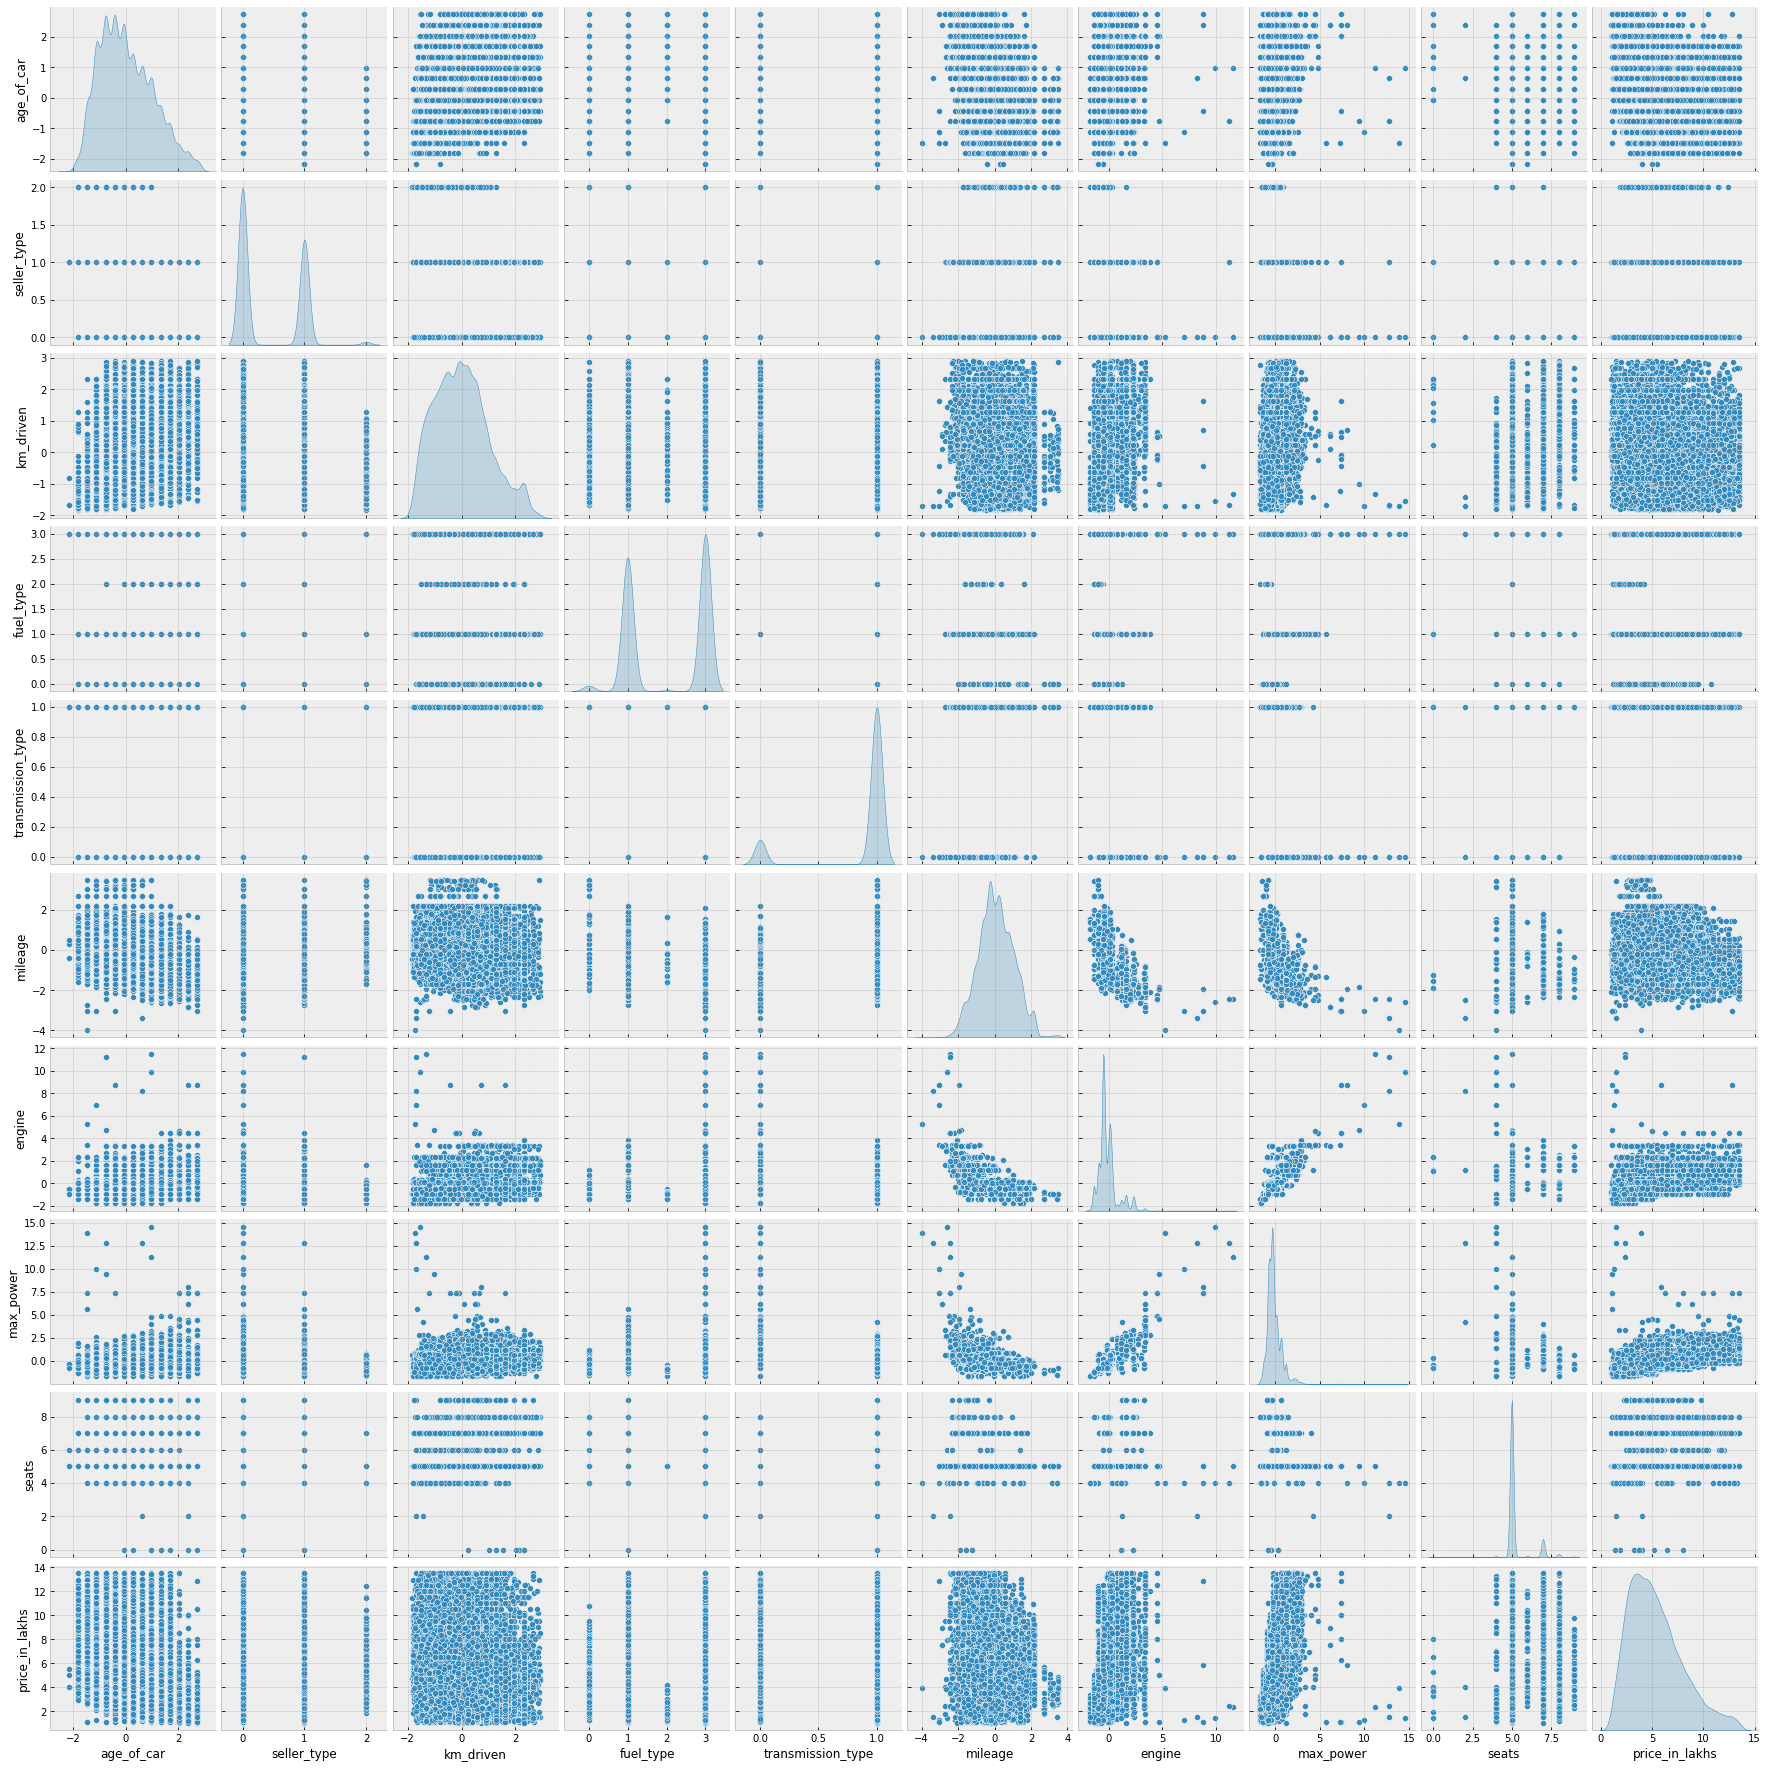

In [ ]:
sns.pairplot(data = model_df,diag_kind= 'kde')
plt.show()

#### To understand relationship between variables, we used a correlation heat-map.

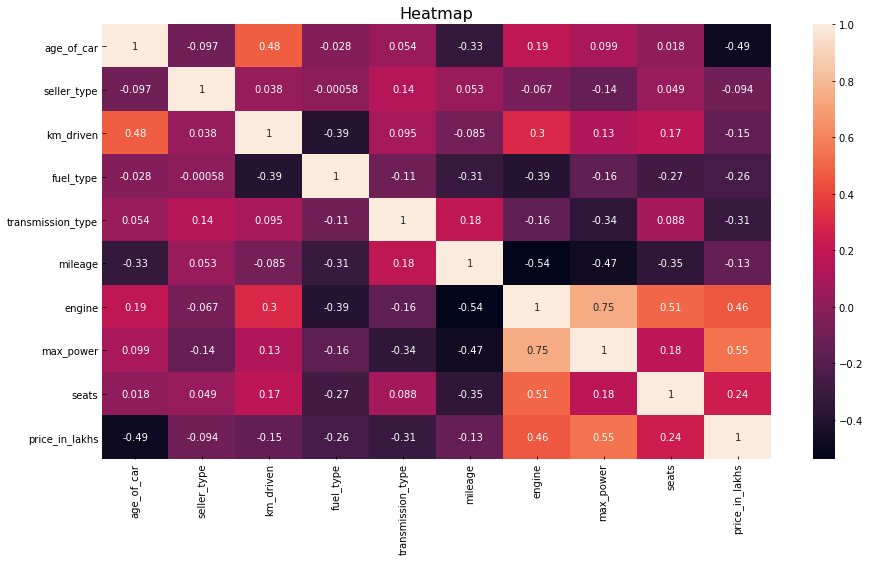

In [ ]:
corr = model_df.corr()
sns.heatmap(corr , annot = True, annot_kws = {'size': 10})
plt.yticks(rotation=0)
plt.title('Heatmap', size = 16)
plt.show()

#### from the above heatmap, we can see that `engine`, `max_power` have high correlation with `price_in_lakhs`

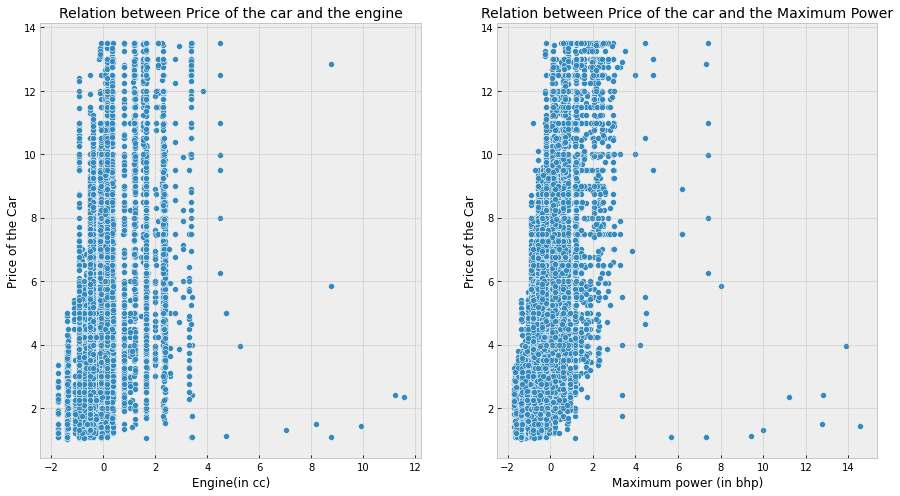

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15,8))

ax = sns.scatterplot(data = model_df, x = 'engine', y = 'price_in_lakhs', ax = axes[0])

ax1 = sns.scatterplot(data = model_df, x = 'max_power', y = 'price_in_lakhs', ax = axes[1])

ax.set_xlabel('Engine(in cc)')
ax.set_ylabel('Price of the Car')
ax.set_title('Relation between Price of the car and the engine', size=14)
ax1.set_xlabel('Maximum power (in bhp)')
ax1.set_ylabel('Price of the Car')
ax1.set_title('Relation between Price of the car and the Maximum Power', size=14)
plt.show()

#### The above distributions shows that the price of the car increases for the cars with higher engine capacity. Also,the price of the car increases as the power of the car increases, for cars with lower max_power and low capacity engines the Price of the car is relatively lower.

### 6.4 Relation - Fuel type vs price.

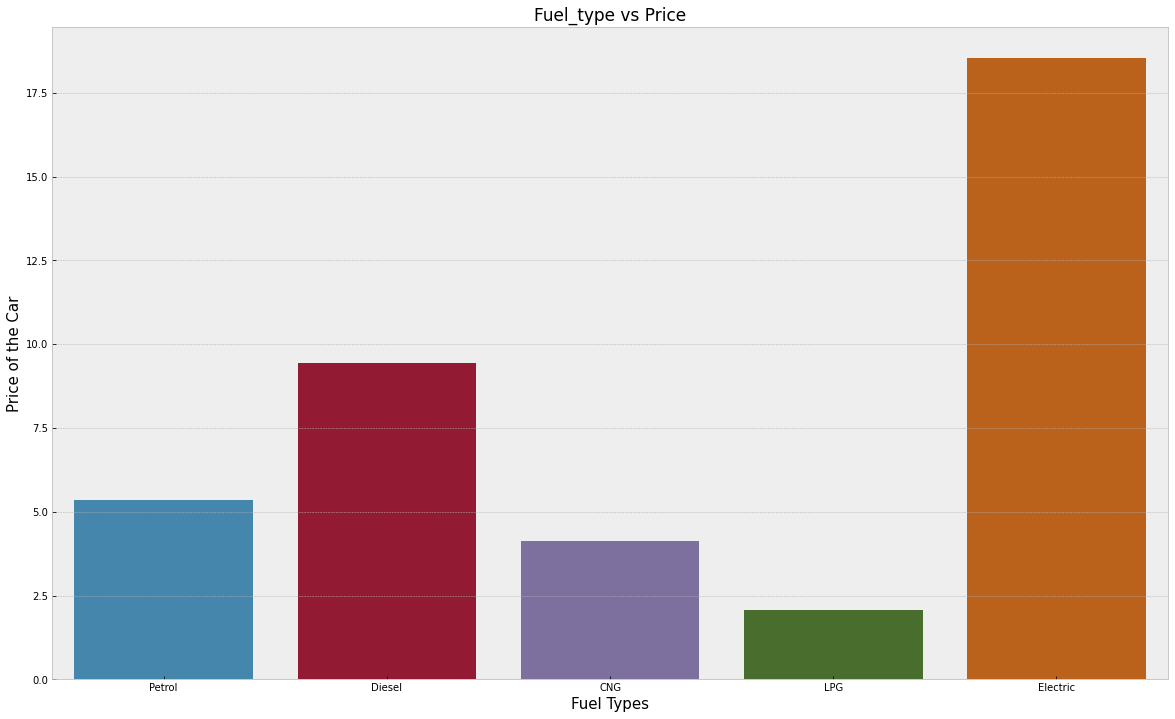

In [ ]:
sns.barplot(y = 'price_in_lakhs', x = 'fuel_type', data = data, ci = 0)
fig = plt.gcf()
fig.set_size_inches(20, 12)
plt.title("Fuel_type vs Price",size=17)
plt.xlabel("Fuel Types",size=15)
plt.ylabel("Price of the Car",size=15)
plt.show()

#### The price of the Electric cars is highest, followed by Diesel Cars and LPG cars having the lowest price.

### 6.5 Relation - Transmission vs price.

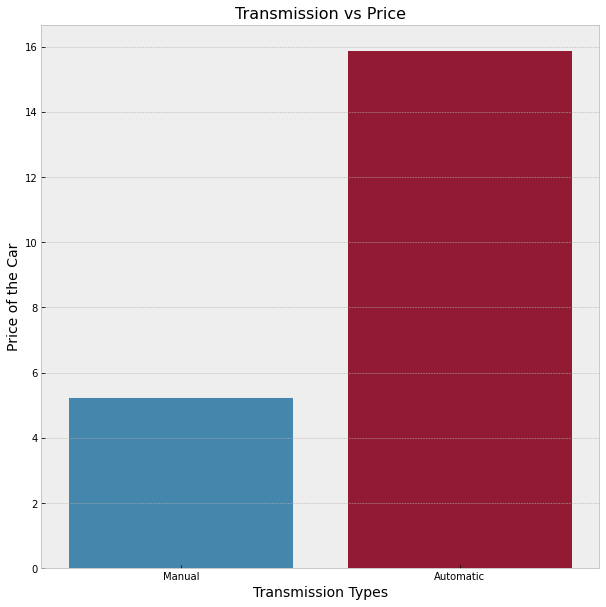

In [ ]:
sns.barplot(y = 'price_in_lakhs', x = 'transmission_type', data = data, ci = 0)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.title("Transmission vs Price",size=16)
plt.xlabel("Transmission Types",size=14)
plt.ylabel("Price of the Car",size=14)
plt.show()

#### Cars with Automatic transmission have higher price as compared to Manual transmission

### 6.6 Relation - km_driven vs price.

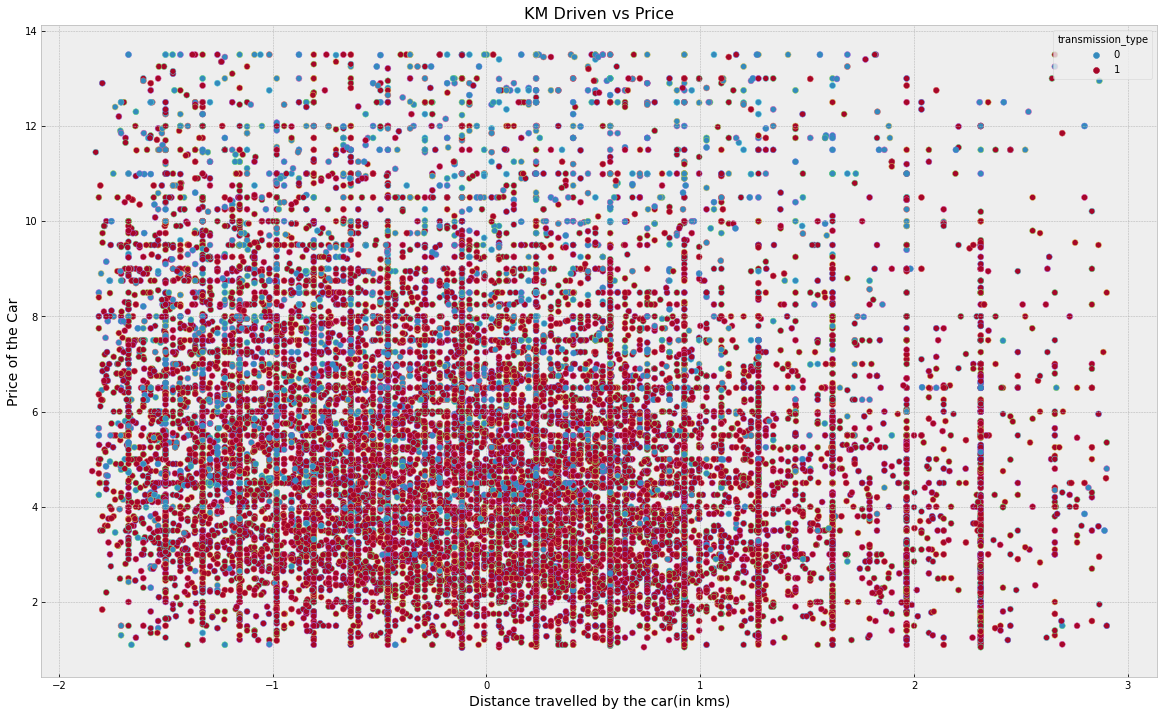

In [ ]:
sns.scatterplot(y = 'price_in_lakhs', x = 'km_driven', hue = 'transmission_type', data = model_df, edgecolor = sns.color_palette('hls', 8))
fig = plt.gcf()
fig.set_size_inches(20, 12)
plt.title("KM Driven vs Price",size=16)
plt.xlabel("Distance travelled by the car(in kms)",size=14)
plt.ylabel("Price of the Car",size=14)
plt.show()

#### By using the Transmission type to find a relation between price and km_driven, we can see that, 
- The cars with manual transmission have less price even though it has been drove for less distance.
- The cars with Automatic transmission have higher prices even with larger distances have been driven.

### 6.7 Relation - Seller type vs price.

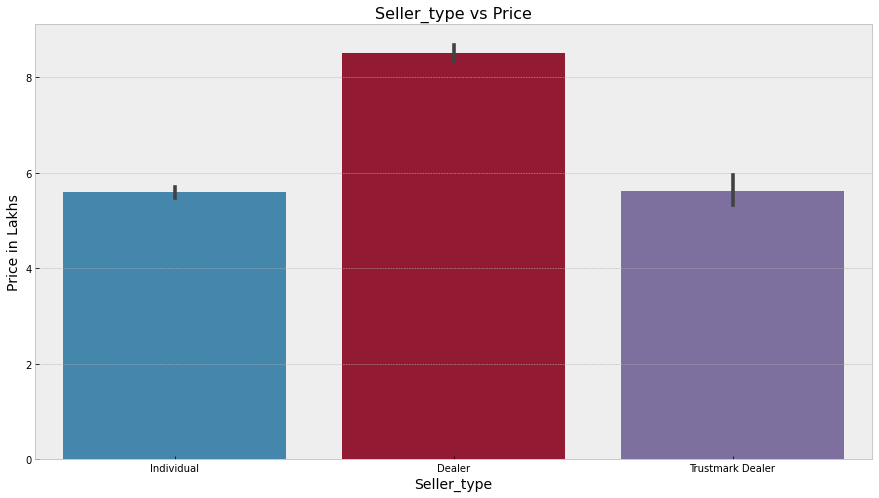

In [ ]:
sns.barplot(data.seller_type, data.price_in_lakhs)
plt.title('Seller_type vs Price', size=16)
plt.xlabel('Seller_type', size=14)
plt.ylabel('Price in Lakhs', size=14)
plt.show()

<a id = "encod"> </a>
## 7. Base Model

In [ ]:
X = model_df.drop('price_in_lakhs', axis=1)
y = model_df['price_in_lakhs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [ ]:
from sklearn.linear_model import LinearRegression

regressor= LinearRegression()
regressor.fit(X_train,y_train)

y_pred_train= regressor.predict(X_train)

y_pred_test=regressor.predict(X_test)

In [ ]:
print("Train R square",regressor.score(X_train,y_train))
print("Test R square",regressor.score(X_test,y_test))

Train R square 0.6705828418301918
Test R square 0.6716388493865569


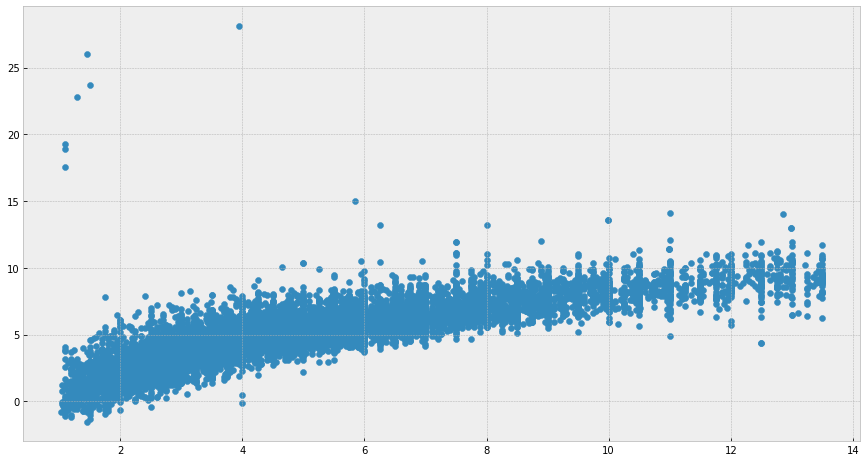

In [ ]:
plt.scatter(y_train,y_pred_train)
plt.show()

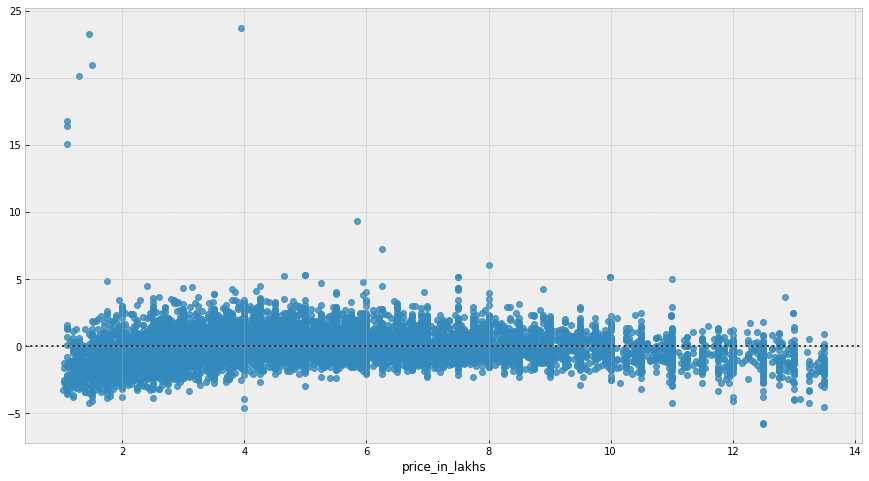

In [ ]:
sns.residplot(y_train,y_pred_train)
plt.show()

<a id = "algocompar"> </a>
## 8. Algorithm Comparison.

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Choosing the best fit model for our dataset.

models=[]

models.append(('LIR', LinearRegression()))
models.append(('XGB', xgb.XGBRegressor()))
models.append(('ABR', AdaBoostRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('RFR', RandomForestRegressor()))

names=[]
result=[]

for name,est in models:
    kfold = KFold(n_splits=10,shuffle=True,random_state=7)
    score = cross_val_score(est,X_train,y_train,cv=kfold,scoring="r2")
    result.append(score)
    names.append(name)
    print('Algorithm :',name,'\n''Score: ',score.mean())

Algorithm : LIR 
Score:  0.6659060992231494
Algorithm : XGB 
Score:  0.8790645422283561
Algorithm : ABR 
Score:  0.650664428350072
Algorithm : KNN 
Score:  0.8070442295507643
Algorithm : RFR 
Score:  0.8673945967845589


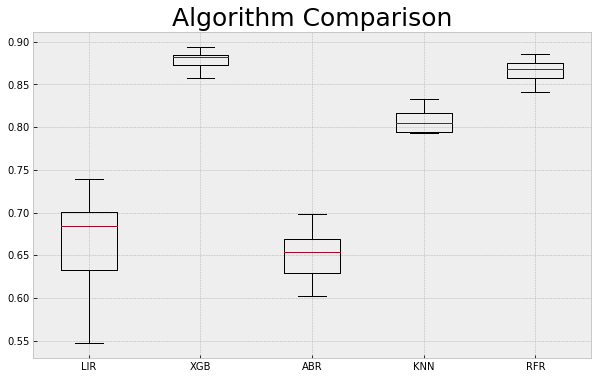

In [ ]:
# Visualising the algorithm comparison.

fig = plt.figure(figsize=(10,6))
plt.boxplot(result,labels=names)
plt.title('Algorithm Comparison',fontsize=25)
plt.show()

### Linear Regression :

In [ ]:
#function to split dataset int training and test
def trainingData(df,n):
    X = df.iloc[:,n]
    y = df.iloc[:,-1:].values.T
    y=y[0]
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.9,test_size=0.1,random_state=0)
    return (X_train,X_test,y_train,y_test)

X_train,X_test,y_train,y_test=trainingData(model_df,list(range(len(list(model_df.columns))-1)))
print("The shape of X_train :", X_train.shape)
print("The shape of y_train :", y_train.shape)
print("The shape of X_test :", X_test.shape)
print("The shape of y_test :", y_test.shape)

The shape of X_train : (14955, 9)
The shape of y_train : (14955,)
The shape of X_test : (1662, 9)
The shape of y_test : (1662,)


In [ ]:
#some of models will predict neg values so this function will remove that values
def remove_neg(y_test,y_pred):
    ind=[index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred=y_pred[ind]
    y_test=y_test[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)

#function for evaluation of model
def result(y_test,y_pred):
    r=[]
    r.append(mean_squared_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)

#dataframe that store the performance of each model
accu=pd.DataFrame(index=['MSE', 'Root MSE', 'R2 Score','Accuracy(%)'])

In [ ]:
#fitting model
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [ ]:
#calculating error/accuracy
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r1_lr=result(y_test_1,y_pred_1)
print('Coefficients: \n', LR.coef_)
print("MSE : {}".format(r1_lr[0]))
print("Root MSE : {}".format(r1_lr[1]))
print("R2 Score : {} or {}%".format(r1_lr[2],r1_lr[3]))
accu['Linear Regression']=r1_lr

Coefficients: 
 [-1.47115371 -0.34877728 -0.13509238 -0.6659245  -0.97718935 -0.37804929
  0.13985557  1.28621195  0.20410317]
MSE : 2.0131497995338177
Root MSE : 1.4188551016695883
R2 Score : 0.7012685701299486 or 70.1269%


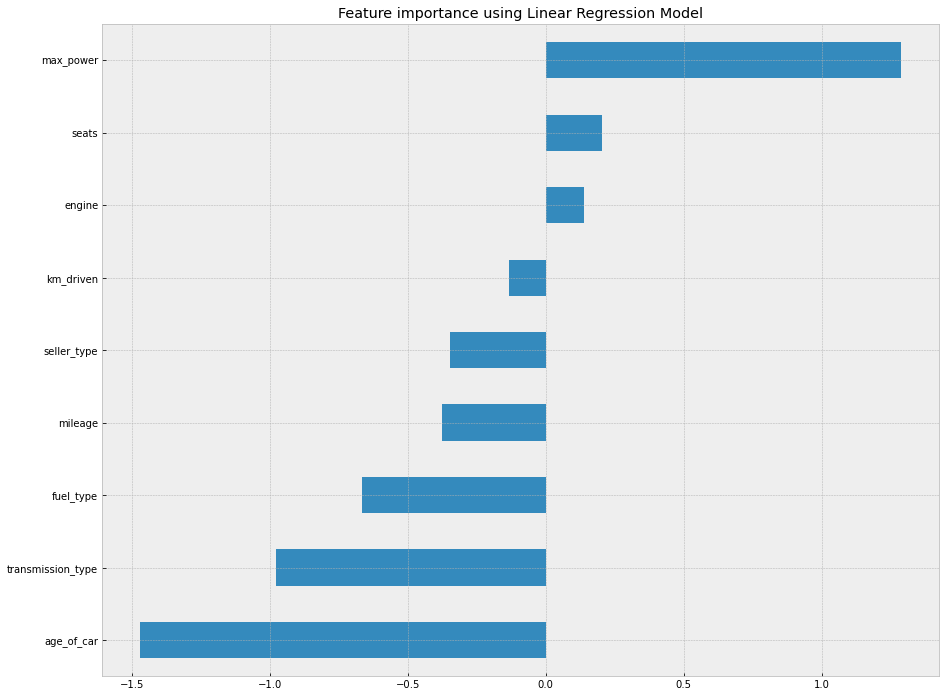

In [ ]:
#Ploting feature importance graph

coef = pd.Series(LR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (15, 12)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.savefig('Linear-Regression-Feature-Importance.jpg')
plt.show()

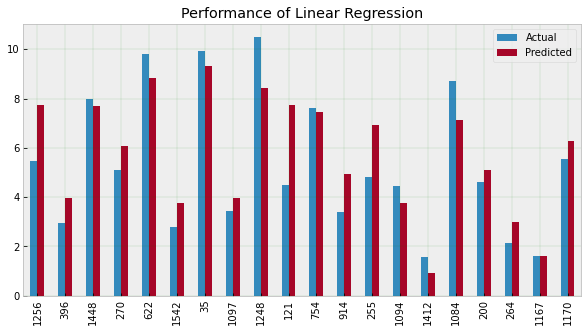

In [ ]:
#Visualization of true value and predicted

df_check = pd.DataFrame({'Actual': y_test_1, 'Predicted': y_pred_1})
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Green')
plt.title('Performance of Linear Regression')
plt.savefig('Linear-Regression-Performance')
plt.show()

### XGBooster

In [ ]:
#model implementation and fitting data

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

In [ ]:
#model evaluation

y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r8_xg=result(y_test_1,y_pred_1)
print("MSE : {}".format(r8_xg[0]))
print("Root MSE : {}".format(r8_xg[1]))
print("R2 Score : {} or {}%".format(r8_xg[2],r8_xg[3]))

MSE : 0.9012001154762426
Root MSE : 0.9493156037252535
R2 Score : 0.8675695573453844 or 86.757%


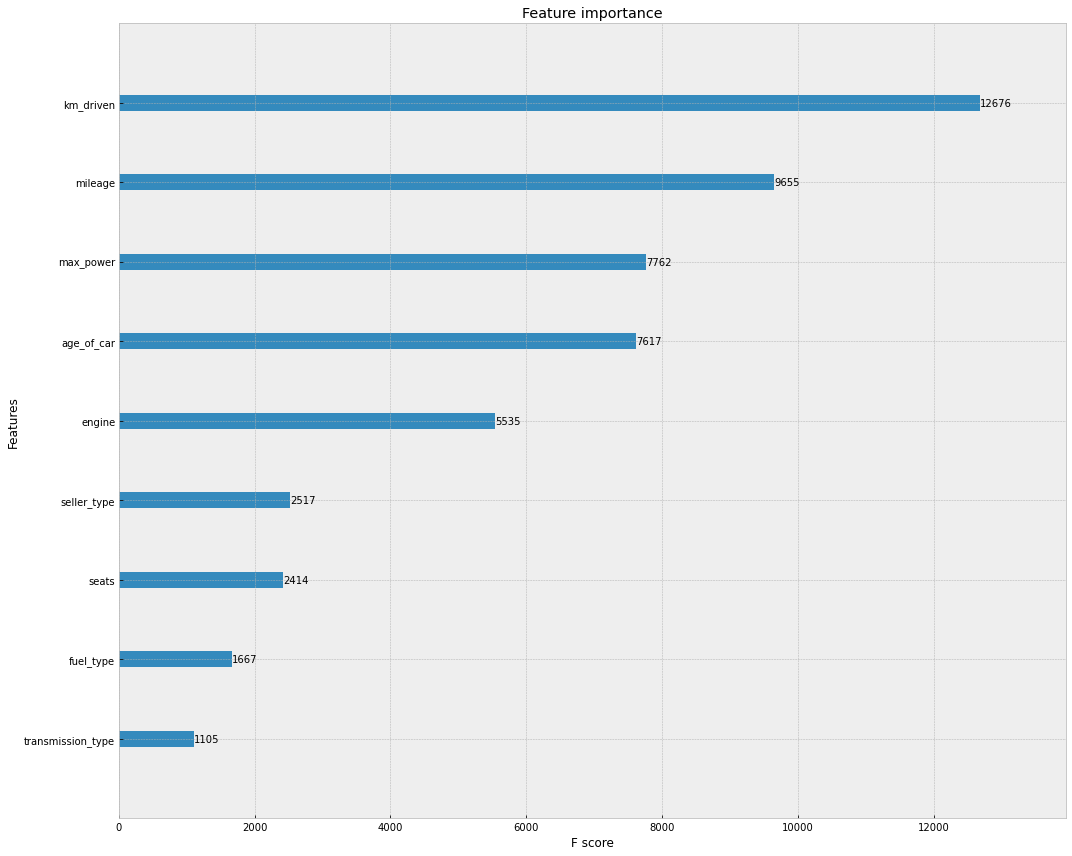

In [ ]:
xgb.plot_importance(xg_reg)
plt.tight_layout()
plt.savefig('XGBoost-Features-Importance.jpg')
plt.show();

In [ ]:
accu['XGBoost Regressor']=r8_xg

### Ada Boost Regressor 

In [ ]:
#model implementation

ABR = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=24),
    n_estimators=200,learning_rate=0.6
)

ABR.fit(X_train, y_train)
y_pred = ABR.predict(X_test)

In [ ]:
#model evaluation

r7_ab=result(y_test,y_pred)
print("MSE : {}".format(r7_ab[0]))
print("Root MSE : {}".format(r7_ab[1]))
print("R2 Score : {} or {}%".format(r7_ab[2],r7_ab[3]))

MSE : 0.8690388337851888
Root MSE : 0.9322225237491254
R2 Score : 0.8722956250605836 or 87.2296%


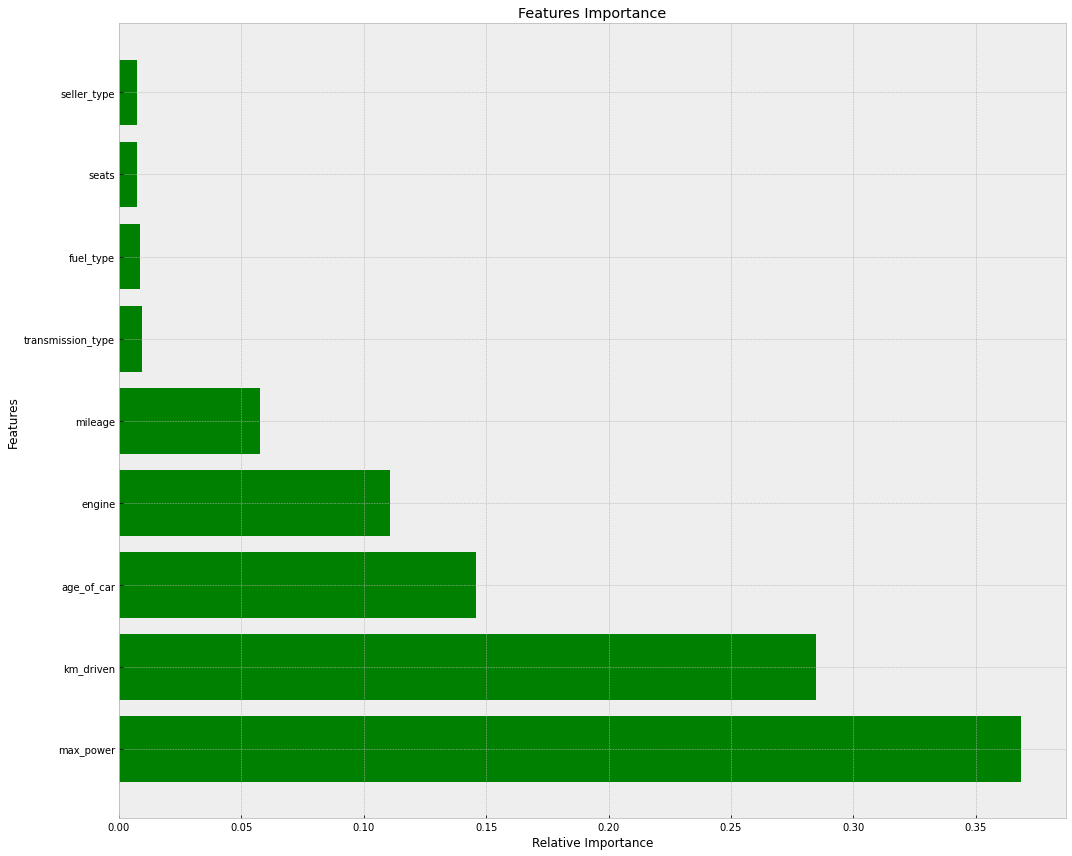

In [ ]:
importances=ABR.feature_importances_
features=X_train.columns

indices = np.argsort(importances)
indices = [x for x in reversed(indices)]
plt.figure(1)
plt.title('Features Importance')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('Adaboost-Features-Importance2.jpg',dpi=60)
plt.show();

In [ ]:
accu['AdaBoost Regressor']=r7_ab

### KNN 

In [ ]:
#estimating MSLE for k=1-9

R_MSLE=[]
for i in range(1,10):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train,y_train)
    y_pred=KNN.predict(X_test)
    error=np.sqrt(mean_squared_log_error(y_test, y_pred))
    R_MSLE.append(error)
    print("K =",i," , Root MSE =",error)

K = 1  , Root MSE = 0.19675246211451344
K = 2  , Root MSE = 0.17952919617151686
K = 3  , Root MSE = 0.17589436893244348
K = 4  , Root MSE = 0.17259608054223605
K = 5  , Root MSE = 0.17130160486800702
K = 6  , Root MSE = 0.17077164400537553
K = 7  , Root MSE = 0.16952885942059373
K = 8  , Root MSE = 0.16989755721495964
K = 9  , Root MSE = 0.16927185891125823


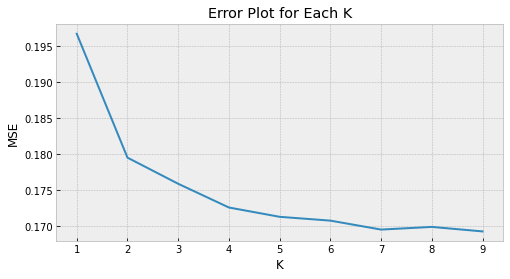

In [ ]:
#plotting error

curve = pd.DataFrame(R_MSLE) #elbow curve 
plt.figure(figsize=(8,4))
plt.xticks(list(range(1,10)), list(range(1,10)), rotation='horizontal')
plt.plot(list(range(1,10)),R_MSLE)
plt.xlabel('K')
plt.ylabel('MSE')
plt.title('Error Plot for Each K')
plt.savefig('KNN-Error-Plot.jpg')
plt.show()

In [ ]:
#model implementation

KNN=KNeighborsRegressor(n_neighbors=9) 
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)

In [ ]:
#model evaluation

r4_knn=result(y_test,y_pred)
print("MSE : {}".format(r4_knn[0]))
print("Root MSE : {}".format(r4_knn[1]))
print("R2 Score : {} or {}%".format(r4_knn[2],r4_knn[3]))
accu['KNN']=r4_knn

MSE : 1.1880078159587586
Root MSE : 1.089957712922276
R2 Score : 0.8254234567408808 or 82.5423%


### Random Forest Regressor

In [ ]:
RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(X_train,y_train)
y_pred = RFR.predict(X_test)

In [ ]:
r5_rf=result(y_test,y_pred)
print("MSE : {}".format(r5_rf[0]))
print("Root MSE : {}".format(r5_rf[1]))
print("R2 Score : {} or {}%".format(r5_rf[2],r5_rf[3]))
accu['RandomForest Regressor']=r5_rf

MSE : 0.8343233683080861
Root MSE : 0.9134130327010263
R2 Score : 0.8773970274917897 or 87.7397%


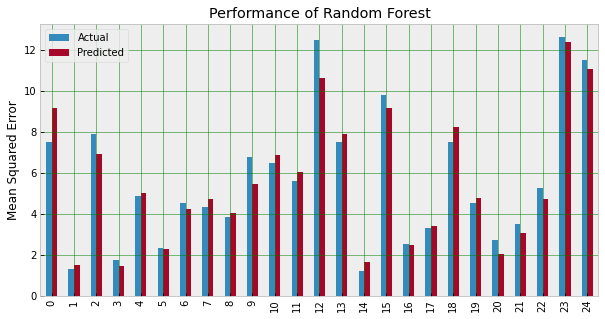

In [ ]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.head(25)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Mean Squared Error')
plt.savefig('Random-Forest-Performance.jpg')
plt.show()

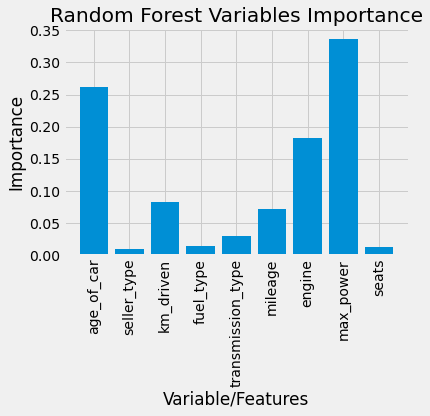

In [ ]:
importances=RFR.feature_importances_
features=X_train.columns

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(6,6))
plt.bar(x_values, importances, orientation = ('vertical'))
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable/Features'); 
plt.title('Random Forest Variables Importance')
plt.tight_layout()
plt.savefig('Random-Forest-Variables-Importances.jpg',dpi=600)
plt.show();

In [ ]:
accu.head()

,Linear Regression,XGBoost Regressor,AdaBoost Regressor,KNN,RandomForest Regressor
MSE,2.013150,0.901200,0.869039,1.188008,0.834323
Root MSE,1.418855,0.949316,0.932223,1.089958,0.913413
R2 Score,0.701269,0.867570,0.872296,0.825423,0.877397
Accuracy(%),70.126900,86.757000,87.229600,82.542300,87.739700


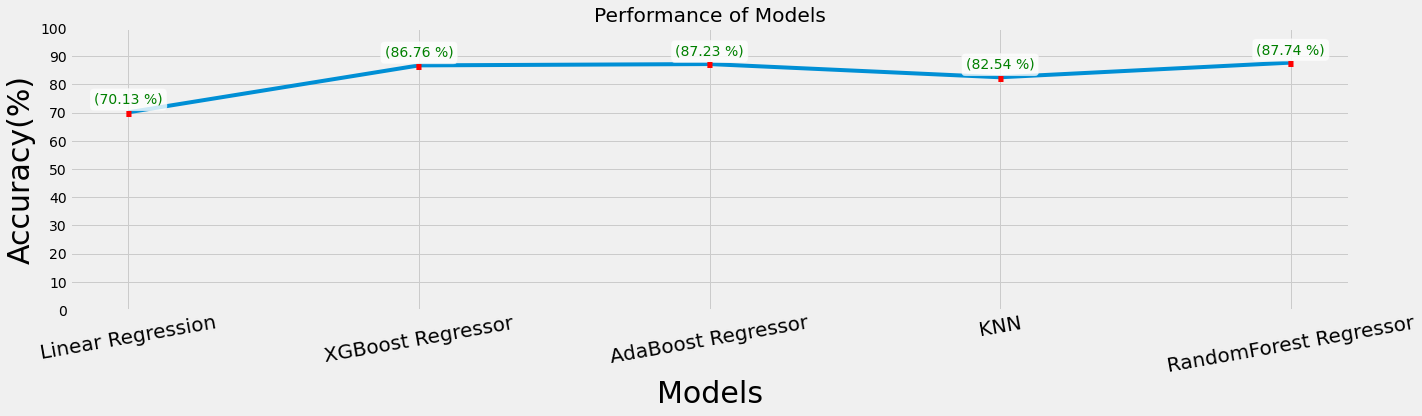

In [ ]:
model_accuracy=accu.loc['Accuracy(%)']


x=list(range(len(model_accuracy)))
y=list(range(0,101,10))
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20,6))
plt.plot(model_accuracy)
plt.yticks(y)
plt.xticks(fontsize=20)
plt.xticks(rotation = (10))
plt.xlabel("Models",fontsize=30)
plt.ylabel("Accuracy(%)",fontsize=30)
plt.title("Performance of Models")
for a,b in zip(x,y):
    b=model_accuracy[a]
    val="("+str(round(model_accuracy[a],2))+" %)"
    plt.text(a, b+4.5, val,horizontalalignment='center',verticalalignment='center',color='green',bbox=props)
    plt.text(a, b+3.5, '.',horizontalalignment='center',verticalalignment='center',color='red',fontsize=50)
plt.tight_layout()
plt.savefig('Overall-Performance.jpg',dpi=600)
plt.show();